# **Penting**
- Jangan mengubah atau menambahkan cell text yang sudah disediakan, Anda hanya perlu mengerjakan cell code yang sudah disediakan.
- Pastikan seluruh kriteria memiliki output yang sesuai, karena jika tidak ada output dianggap tidak selesai.
- Misal, Anda menggunakan df = df.dropna() silakan gunakan df.isnull().sum() sebagai tanda sudah berhasil. Silakan sesuaikan seluruh output dengan perintah yang sudah disediakan.
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Pastikan Anda menggunakan variabel df dari awal sampai akhir dan tidak diperbolehkan mengganti nama variabel tersebut.
- Hapus simbol pagar (#) pada kode yang bertipe komentar jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan
- Pastikan Anda mengerjakan sesuai section yang sudah diberikan tanpa mengubah judul atau header yang disediakan.

# **INFORMASI DATASET**

Dataset ini menyajikan gambaran mendalam mengenai perilaku transaksi dan pola aktivitas keuangan, sehingga sangat ideal untuk eksplorasi **deteksi penipuan (fraud detection)** dan **identifikasi anomali**. Dataset ini mencakup **2.512 sampel data transaksi**, yang mencakup berbagai atribut transaksi, demografi nasabah, dan pola penggunaan.

Setiap entri memberikan wawasan komprehensif terhadap perilaku transaksi, memungkinkan analisis untuk **keamanan finansial** dan pengembangan model prediktif.

## Fitur Utama

- **`TransactionID`**: Pengidentifikasi unik alfanumerik untuk setiap transaksi.  
- **`AccountID`**: ID unik untuk setiap akun, dapat memiliki banyak transaksi.  
- **`TransactionAmount`**: Nilai transaksi dalam mata uang, mulai dari pengeluaran kecil hingga pembelian besar.  
- **`TransactionDate`**: Tanggal dan waktu transaksi terjadi.  
- **`TransactionType`**: Tipe transaksi berupa `'Credit'` atau `'Debit'`.  
- **`Location`**: Lokasi geografis transaksi (nama kota di Amerika Serikat).  
- **`DeviceID`**: ID perangkat yang digunakan dalam transaksi.  
- **`IP Address`**: Alamat IPv4 yang digunakan saat transaksi, dapat berubah untuk beberapa akun.  
- **`MerchantID`**: ID unik merchant, menunjukkan merchant utama dan anomali transaksi.  
- **`AccountBalance`**: Saldo akun setelah transaksi berlangsung.  
- **`PreviousTransactionDate`**: Tanggal transaksi terakhir pada akun, berguna untuk menghitung frekuensi transaksi.  
- **`Channel`**: Kanal transaksi seperti `Online`, `ATM`, atau `Branch`.  
- **`CustomerAge`**: Usia pemilik akun.  
- **`CustomerOccupation`**: Profesi pengguna seperti `Dokter`, `Insinyur`, `Mahasiswa`, atau `Pensiunan`.  
- **`TransactionDuration`**: Lama waktu transaksi (dalam detik).  
- **`LoginAttempts`**: Jumlah upaya login sebelum transaksi—jumlah tinggi bisa mengindikasikan anomali.

Tugas kamu adalah membuat model clustering yang selanjutnya akan digunakan untuk membuat model klasifikasi.


# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [1]:
#Type your code here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

print("All libraries imported successfully!")

All libraries imported successfully!


# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

Penting: pada kriteria pertama hindari penggunaan print() dan display() karena seluruh fungsi yang digunakan sudah memiliki standar output dan menghasilkan output yang diharapkan.

Kriteria 1 akan ditolak ketika:
- print(__.head())
- display(___.head())
dst

Kriteria 1 akan diterima ketika Anda menggunakan fungsi yang diminta tanpa menambahkan deskripsi apapun.

In [2]:
# Load data
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

In [3]:
# Tampilkan 5 baris pertama dengan function head.
df.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,14.09,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,70.0,Doctor,81.0,1.0,5112.21,2024-11-04 08:08:08
1,TX000002,AC00455,376.24,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,68.0,Doctor,141.0,1.0,13758.91,2024-11-04 08:09:35
2,TX000003,AC00019,126.29,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,19.0,Student,56.0,1.0,1122.35,2024-11-04 08:07:04
3,TX000004,AC00070,184.50,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,26.0,Student,25.0,1.0,8569.06,2024-11-04 08:09:06
4,TX000005,AC00411,13.45,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,198.0,1.0,7429.40,2024-11-04 08:06:39


In [4]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  AccountBalance          

In [5]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
df.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance
count,2511.000000,2519.000000,2511.000000,2516.000000,2510.000000
mean,297.656468,44.678444,119.422939,1.121622,5113.438124
std,292.230367,17.837359,70.078513,0.594469,3897.975861
min,0.260000,18.000000,10.000000,1.000000,101.250000
25%,81.310000,27.000000,63.000000,1.000000,1504.727500
50%,211.360000,45.000000,112.000000,1.000000,4734.110000
75%,413.105000,59.000000,161.000000,1.000000,7672.687500
max,1919.110000,80.000000,300.000000,5.000000,14977.990000


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

**Apabila ingin menerapkan Advanced, pastikan seluruh visualisasi tidak ada yang overlap**

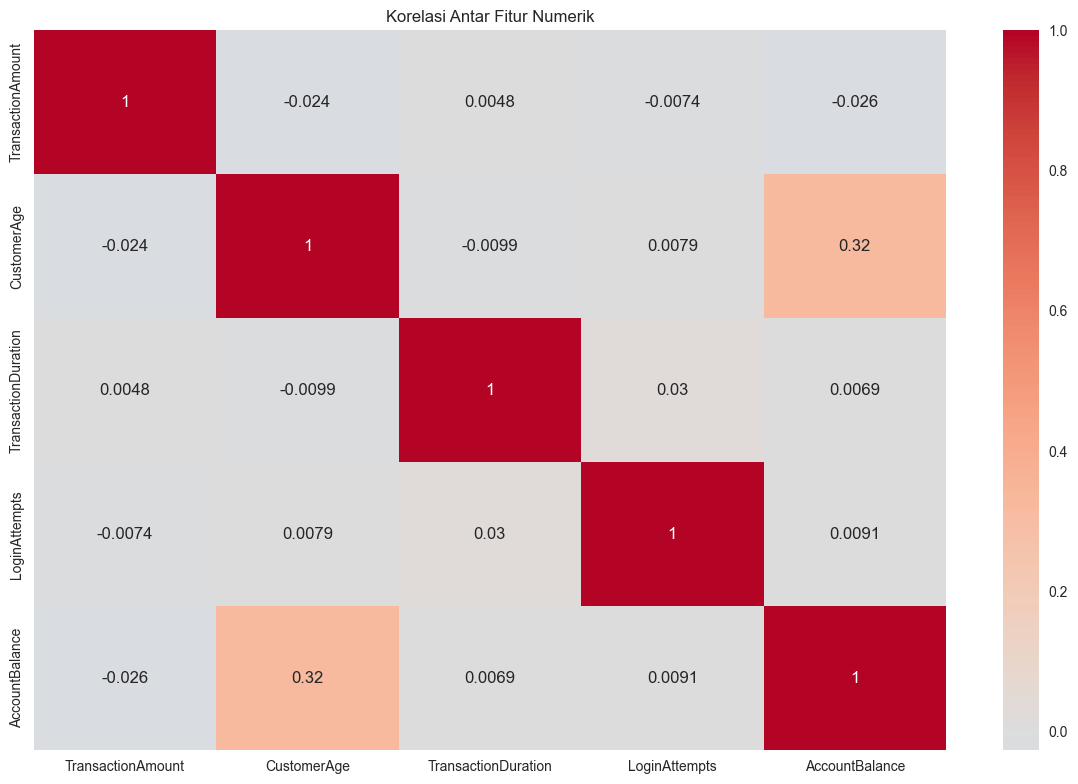

In [6]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Korelasi Antar Fitur Numerik')
plt.tight_layout()
plt.show()

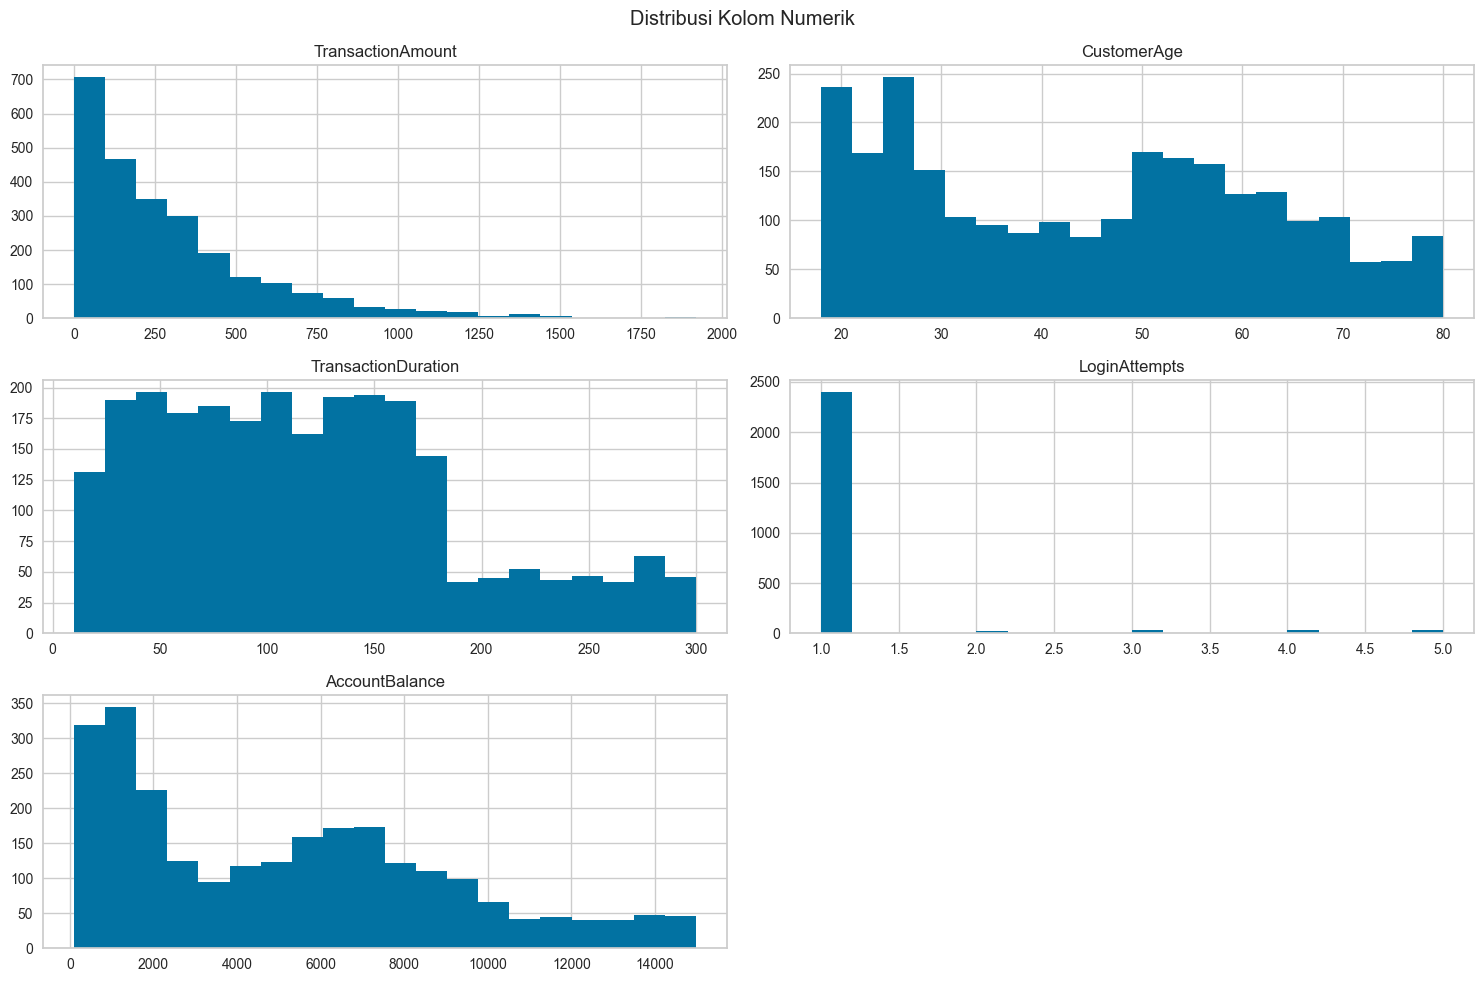

In [7]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
numeric_df.hist(figsize=(15, 10), bins=20)
plt.suptitle('Distribusi Kolom Numerik')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

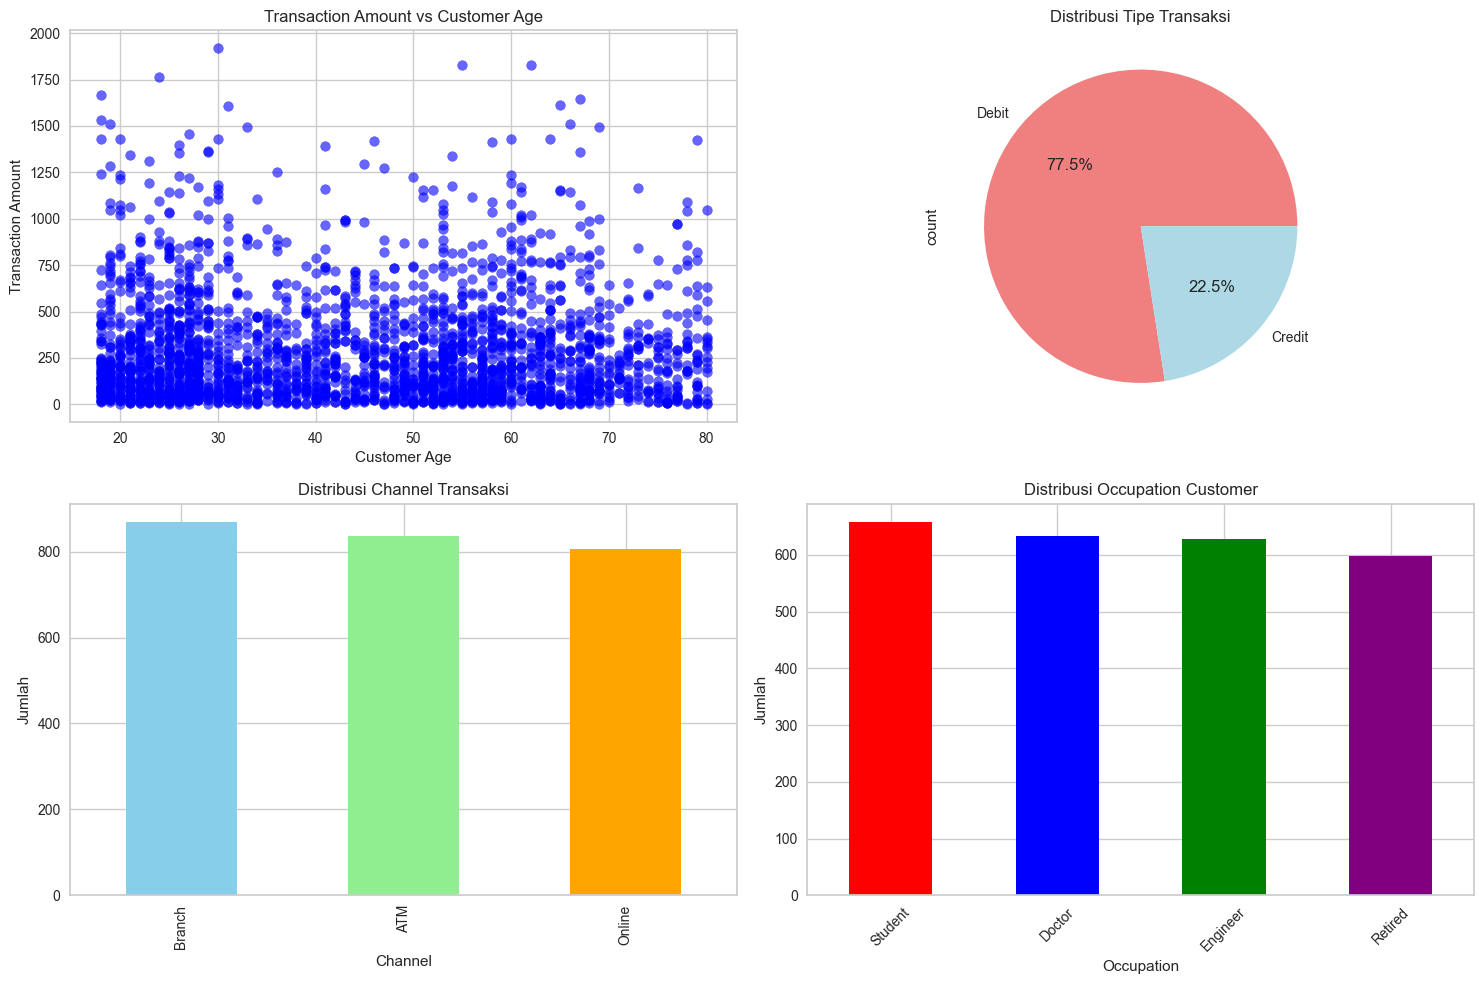

In [8]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

axes[0,0].scatter(df['CustomerAge'], df['TransactionAmount'], alpha=0.6, color='blue')
axes[0,0].set_title('Transaction Amount vs Customer Age')
axes[0,0].set_xlabel('Customer Age')
axes[0,0].set_ylabel('Transaction Amount')

df['TransactionType'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%', colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Distribusi Tipe Transaksi')

df['Channel'].value_counts().plot(kind='bar', ax=axes[1,0], color=['skyblue', 'lightgreen', 'orange'])
axes[1,0].set_title('Distribusi Channel Transaksi')
axes[1,0].set_xlabel('Channel')
axes[1,0].set_ylabel('Jumlah')

df['CustomerOccupation'].value_counts().plot(kind='bar', ax=axes[1,1], color=['red', 'blue', 'green', 'purple', 'brown'])
axes[1,1].set_title('Distribusi Occupation Customer')
axes[1,1].set_xlabel('Occupation')
axes[1,1].set_ylabel('Jumlah')
axes[1,1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [9]:
# Mengecek dataset menggunakan isnull().sum()
df.isnull().sum()

TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64

In [10]:
# Mengecek dataset menggunakan duplicated().sum()
df.duplicated().sum()

np.int64(21)

In [11]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
# Pastikan kamu menggunakan function head setelah melalukan scaling.
numeric_cols = df.select_dtypes(include=[np.number]).columns
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numeric_cols] = scaler.fit_transform(df[numeric_cols])
df_scaled.head()

,TransactionID,AccountID,TransactionAmount,TransactionDate,TransactionType,Location,DeviceID,IP Address,MerchantID,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,TX000001,AC00128,0.007207,2023-04-11 16:29:14,Debit,San Diego,D000380,162.198.218.92,M015,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,TX000002,AC00455,0.195940,2023-06-27 16:44:19,Debit,Houston,D000051,13.149.61.4,M052,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,TX000003,AC00019,0.065680,2023-07-10 18:16:08,Debit,Mesa,D000235,215.97.143.157,M009,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,TX000004,AC00070,0.096016,2023-05-05 16:32:11,Debit,Raleigh,D000187,200.13.225.150,M002,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,TX000005,AC00411,0.006874,2023-10-16 17:51:24,Credit,Atlanta,D000308,65.164.3.100,M091,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [12]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
df_scaled = df_scaled.drop(columns=columns_to_drop)
df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,2023-04-11 16:29:14,Debit,San Diego,ATM,0.838710,Doctor,0.244828,0.0,0.336832,2024-11-04 08:08:08
1,0.195940,2023-06-27 16:44:19,Debit,Houston,ATM,0.806452,Doctor,0.451724,0.0,0.918055,2024-11-04 08:09:35
2,0.065680,2023-07-10 18:16:08,Debit,Mesa,Online,0.016129,Student,0.158621,0.0,0.068637,2024-11-04 08:07:04
3,0.096016,2023-05-05 16:32:11,Debit,Raleigh,Online,0.129032,Student,0.051724,0.0,0.569198,2024-11-04 08:09:06
4,0.006874,2023-10-16 17:51:24,Credit,Atlanta,Online,NaN,Student,0.648276,0.0,0.492591,2024-11-04 08:06:39


In [13]:
# Melakukan feature encoding menggunakan LabelEncoder() untuk fitur kategorikal.
# Pastikan kamu menggunakan function head setelah melalukan encoding.
categorical_cols = df_scaled.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in categorical_cols:
    df_scaled[col] = label_encoder.fit_transform(df_scaled[col])

df_scaled.head()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate
0,0.007207,680,1,36,0,0.838710,0,0.244828,0.0,0.336832,105
1,0.195940,1178,1,15,0,0.806452,0,0.451724,0.0,0.918055,192
2,0.065680,1262,1,23,2,0.016129,3,0.158621,0.0,0.068637,41
3,0.096016,818,1,33,2,0.129032,3,0.051724,0.0,0.569198,163
4,0.006874,1939,0,1,2,NaN,3,0.648276,0.0,0.492591,16


In [14]:
# Last checking gunakan columns.tolist() untuk checking seluruh fitur yang ada.
# Perbaiki kode di bawah ini tanpa menambahkan atau mengurangi cell code ini.
# ____.columns.tolist()
df_scaled.columns.tolist()

['TransactionAmount',
 'TransactionDate',
 'TransactionType',
 'Location',
 'Channel',
 'CustomerAge',
 'CustomerOccupation',
 'TransactionDuration',
 'LoginAttempts',
 'AccountBalance',
 'PreviousTransactionDate']

(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [15]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
print("Sebelum handling missing values:")
print(df_scaled.isnull().sum())

df_scaled = df_scaled.fillna(df_scaled.mean(numeric_only=True))

print("\nSetelah handling missing values:")
print(df_scaled.isnull().sum())

Sebelum handling missing values:
TransactionAmount          26
TransactionDate             0
TransactionType             0
Location                    0
Channel                     0
CustomerAge                18
CustomerOccupation          0
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate     0
dtype: int64

Setelah handling missing values:
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
Channel                    0
CustomerAge                0
CustomerOccupation         0
TransactionDuration        0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


In [16]:
# Menghapus data duplikat menggunakan drop_duplicates().
print("Sebelum menghapus duplikat:", df_scaled.duplicated().sum())
df_scaled = df_scaled.drop_duplicates()
print("Setelah menghapus duplikat:", df_scaled.duplicated().sum())

Sebelum menghapus duplikat: 22
Setelah menghapus duplikat: 0


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [17]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
num = df_scaled.select_dtypes(include=[np.number])
Q1 = num.quantile(0.25)
Q3 = num.quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.0 * IQR
upper = Q3 + 1.0 * IQR

mask_row_outlier = ((num < lower) | (num > upper)).any(axis=1)
df_scaled = df_scaled[~mask_row_outlier].copy().reset_index(drop=True)


print(f"\nJumlah data setelah drop outliers: {len(df_scaled)}")
print(f"Total baris yang di-drop: {mask_row_outlier.sum()}")



Jumlah data setelah drop outliers: 1521
Total baris yang di-drop: 994


In [18]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder.
# Pastikan kamu mengerjakan tahapan ini pada satu cell.

df_scaled["kategori_amount"] = pd.qcut(df_scaled['TransactionAmount'], q=4, labels=['Amount_Rendah', 'Amount_Menengah', 'Amount_Tinggi', 'Amount_Sangat_Tinggi'])
df_scaled["kategori_balance"] = pd.qcut(df_scaled['AccountBalance'], q=4, labels=['Balance_Rendah', 'Balance_Menengah', 'Balance_Tinggi', 'Balance_Sangat_Tinggi'])

encoder = LabelEncoder()
df_scaled["kategori_amount_encoded"] = encoder.fit_transform(df_scaled["kategori_amount"])
df_scaled["kategori_balance_encoded"] = encoder.fit_transform(df_scaled["kategori_balance"])

df_scaled = df_scaled.drop(['kategori_amount', 'kategori_balance'], axis=1)

df_scaled[['TransactionAmount', 'AccountBalance', 'kategori_amount_encoded', 'kategori_balance_encoded']].head()

,TransactionAmount,AccountBalance,kategori_amount_encoded,kategori_balance_encoded
0,0.007207,0.336832,1,3
1,0.195940,0.918055,2,2
2,0.065680,0.068637,0,1
3,0.096016,0.569198,3,2
4,0.047888,0.045738,0,1


# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Pastikan Anda menggunakan dataframe yang sudah melalui processing sesuai dengan levelnya (Basic, Skilled, Advanced)
2. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
3. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
4. Jalankan cell code `joblib.dump(model_kmeans, "model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [19]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_scaled.describe()

,TransactionAmount,TransactionDate,TransactionType,Location,Channel,CustomerAge,CustomerOccupation,TransactionDuration,LoginAttempts,AccountBalance,PreviousTransactionDate,kategori_amount_encoded,kategori_balance_encoded
count,1521.000000,1521.000000,1521.0,1521.000000,1521.000000,1521.000000,1521.000000,1521.000000,1521.0,1521.000000,1521.000000,1521.000000,1521.000000
mean,0.118745,1241.612755,1.0,21.205128,0.919132,0.425535,1.579224,0.343668,0.0,0.316166,181.881657,1.499671,1.499671
std,0.094865,731.673052,0.0,12.397421,0.841776,0.286639,1.131692,0.207371,0.0,0.235384,104.136994,1.118107,1.118107
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.038804,612.000000,1.0,10.000000,0.000000,0.145161,1.000000,0.168966,0.0,0.092656,93.000000,1.000000,1.000000
50%,0.095604,1239.000000,1.0,21.000000,1.000000,0.419355,2.000000,0.331034,0.0,0.301097,184.000000,1.000000,1.000000
75%,0.177653,1878.000000,1.0,32.000000,2.000000,0.661290,3.000000,0.489655,0.0,0.487835,271.000000,2.000000,2.000000
max,0.379978,2485.000000,1.0,43.000000,3.000000,1.000000,4.000000,0.858621,0.0,0.918055,360.000000,3.000000,3.000000


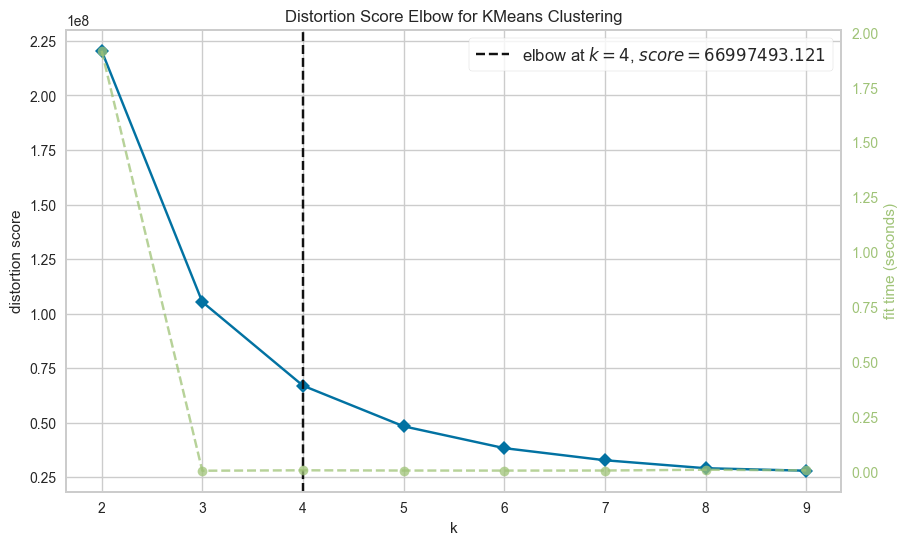

In [20]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
plt.figure(figsize=(10, 6))
visualizer = KElbowVisualizer(KMeans(random_state=42), k=(2, 10))
visualizer.fit(df_scaled)
visualizer.show()
plt.show()

In [21]:
n_clusters = 3
model_kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_labels = model_kmeans.fit_predict(df_scaled)

print(f"Proses clustering selesai")

Proses clustering selesai


Jalankan cell code ini untuk menyimpan model kamu.

In [22]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
import joblib
joblib.dump(model_kmeans, "model_clustering.h5")
print("Model berhasil disimpan sebagai 'model_clustering.h5'")

Model berhasil disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [23]:
# Menghitung dan menampilkan nilai Silhouette Score.
silhouette_avg = silhouette_score(df_scaled, kmeans_labels)
print(f"Silhouette Score: {silhouette_avg:.4f}")

Silhouette Score: 0.5456


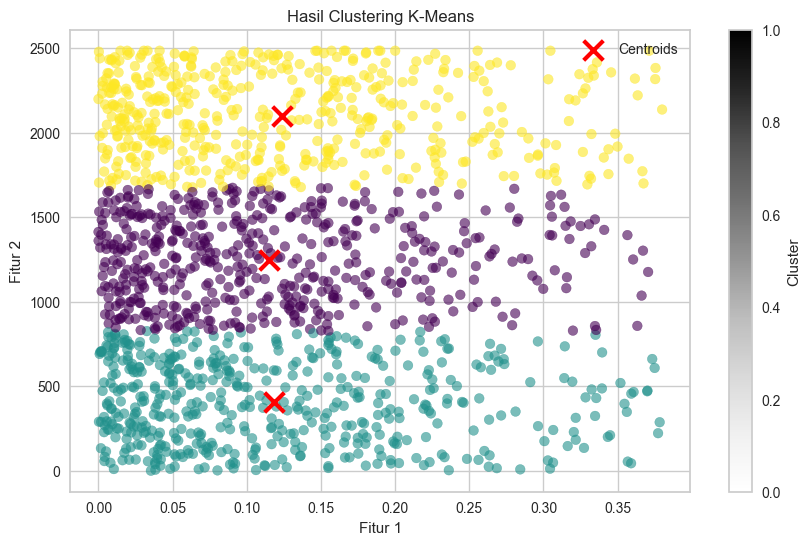

In [24]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))

plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1],
           c=kmeans_labels, cmap='viridis', alpha=0.6)

plt.scatter(model_kmeans.cluster_centers_[:, 0], model_kmeans.cluster_centers_[:, 1],
           marker='x', s=200, linewidths=3, color='red', label='Centroids')

plt.title('Hasil Clustering K-Means')
plt.xlabel('Fitur 1')
plt.ylabel('Fitur 2')
plt.legend()
plt.colorbar(label='Cluster')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [25]:
# Membangun model menggunakan PCA.
# ___ =PCA(n_components=<x>)
# ___ = ____.fit_transform(___)
# Menyimpan data PCA sebagai Dataframe dengan nama PCA_<numbers>
# <data_final> = pd.DataFrame(___, columns=['PCA1', 'PCA2', <sesuaikan dengan jumlah n>])
# Pastikan kamu membangun model Kmeans baru dengan data yang sudah dimodifikasi melalui PCA.
# ___ = KMeans(n_clusters=<x>)
# ___.fit(<data_final>)

pca = PCA(n_components=3)
pca_result = pca.fit_transform(df_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2', 'PCA3'])

print(f"Variansi yang dijelaskan: {pca.explained_variance_ratio_.sum():.4f}")
print(f"Variansi per komponen: {pca.explained_variance_ratio_}")

pca_kmeans = KMeans(n_clusters=3, random_state=42)
pca_labels = pca_kmeans.fit_predict(pca_df)
pca_silhouette = silhouette_score(pca_df, pca_labels)

print(f"Silhouette Score dengan PCA: {pca_silhouette:.4f}")
pca_df.head()

Variansi yang dijelaskan: 1.0000
Variansi per komponen: [9.79861488e-01 1.98491968e-02 2.80760035e-04]
Silhouette Score dengan PCA: 0.5455


,PCA1,PCA2,PCA3
0,-561.662972,-76.580333,14.445417
1,-63.606552,10.194009,-6.145335
2,20.292418,-140.902843,1.049277
3,-423.624061,-18.658801,11.732361
4,-606.725872,-168.506632,5.968805


In [26]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# Pastikan yang disimpan model yang sudah melalui .fit berdasarkan dataset yang sudah dilakukan PCA
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca_kmeans, "PCA_model_clustering.h5")
print("Model PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'")

Model PCA berhasil disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [27]:
# Menampilkan analisis deskriptif minimal mean, min dan max untuk fitur numerik.
# Silakan menambahkan fungsi agregasi lainnya untuk experience lebih baik.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max.

df_with_clusters = df_scaled.copy()
df_with_clusters['Cluster'] = kmeans_labels

num_col = ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'AccountBalance', 'LoginAttempts']

agregasi_data = df_with_clusters[num_col + ['Cluster']]
agg_result = agregasi_data.groupby("Cluster")[num_col].agg(["mean", "min", "max", "median", "std"])

pd.set_option('display.max_columns', None)
print("Analisis Deskriptif Cluster dengan Multiple Aggregasi:")
agg_result.round(4)

Analisis Deskriptif Cluster dengan Multiple Aggregasi:


TransactionAmount                                 CustomerAge       \
                     mean     min     max  median     std        mean  min   
Cluster                                                                      
0                  0.1150  0.0000  0.3706  0.0948  0.0900      0.4412  0.0   
1                  0.1180  0.0003  0.3784  0.0907  0.0962      0.4040  0.0   
2                  0.1234  0.0000  0.3800  0.1058  0.0983      0.4316  0.0   

                             TransactionDuration                          \
         max  median     std                mean     min     max  median   
Cluster                                                                    
0        1.0  0.4677  0.2919              0.3497  0.0034  0.8586  0.3448   
1        1.0  0.3710  0.2834              0.3366  0.0000  0.8552  0.3241   
2        1.0  0.4355  0.2837              0.3447  0.0034  0.8552  0.3276   

                AccountBalance                                 LoginAttempts  \
            std           mean     min     max  median     std          mean   
Cluster                                                                        
0        0.2063         0.3044  0.0011  0.9181  0.2864  0.2314           0.0   
1        0.2104         0.3186  0.0008  0.9163  0.2981  0.2407           0.0   
2        0.2054         0.3258  0.0000  0.9065  0.3334  0.2339           0.0   

                               
         min  max median  std  
Cluster                        
0        0.0  0.0    0.0  0.0  
1        0.0  0.0    0.0  0.0  
2        0.0  0.0    0.0  0.0

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [28]:
# Pastikan nama kolom clustering sudah diubah menjadi Target

In [29]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)

(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [30]:
# inverse dataset ke rentang normal untuk numerikal
# df[numerical_cols] = <nama_scaler>.inverse_transform(df[numerical_cols])
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [31]:
# inverse dataset yang sudah diencode ke kategori aslinya.
# Lengkapi kode berikut jika ingin menerapkan kriteria ini (silakan hapus simbol pagar pada kode yang akan digunakan.)
# for ___ in categorical_cols:
#     ___ = encoders[col]
#     df[col] = ___.inverse_transform(df_inverse[col].astype(int))
# tampilkan dataset yang sudah di-inverse
# ___.head()

In [32]:
# Lakukan analisis deskriptif minimal mean, min dan max untuk fitur numerik dan mode untuk kategorikal seperti pada basic tetapi menggunakan data yang sudah diinverse.
# pastikan output menghasilkan agregasi dan groupby bersamaan dengan mean, min, dan max kembali setelah melakukan inverse.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [33]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [34]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)

OPSIONAL

End of Code.